<a href="https://colab.research.google.com/github/vlopesliliane/imersao-dados-desafio-final/blob/main/imersao_dados_desafio_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://ibb.co/x2HNNwK"><img src="https://i.ibb.co/BfN99vH/1-Banner-Desafio-Git-Hub.png" alt="1-Banner-Desafio-Git-Hub" border="0"></a>


# **Comparação de modelos de *Machine Learning* na previsão dos Mecanismos de Ação (MoA) e descoberta de novas drogas**

#A Consulta Médica

# A Anamnese 

### Bibliotecas Necessárias

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

#imporata o modelo de regressão logística
from sklearn.linear_model import LogisticRegression
#importa função de teste
from sklearn.model_selection import train_test_split

from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier

from sklearn import tree

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier


### Importação da base de dados

In [ ]:
url_dados = 'https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_experimentos.zip?raw=true'
dados = pd.read_csv(url_dados, compression = 'zip')

dados_resultados = pd.read_csv('https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_resultados.csv?raw=true')
dados_resultados.head()

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,...,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_000644bb2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,id_0015fd391,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Criação do *DataFrame* de Teste

In [ ]:
dados_resultados['n_moa'] = dados_resultados.drop('id', axis=1).sum(axis=1)
dados_resultados['n_moa'] != 0
dados_resultados['ativo_moa'] = (dados_resultados['n_moa'] != 0)
dados_combinados = pd.merge(dados, dados_resultados[['id','n_moa', 'ativo_moa']], on='id')
dados_combinados.head()

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,...,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99,n_moa,ativo_moa
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,...,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176,3.0,True
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,...,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371,0.0,False
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,...,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931,7.0,True
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,...,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154,0.0,False
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,...,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125,3.0,True


### Compreensão das variáveis

A base de dados consiste nos registros de pesquisa científica com vários compostos aplicados em culturas de células que foram submetidas a um tipo de tratamento com drogas específicas. No total, foram investigadas **3289 tipos de drogas**, não sendo possível a identificação nominal de cada um delas, uma vez que o dados foram **anonimizados** para evitar vieses de confirmação capazes de direcionar a análise de resultados da pesquisa.

O DataFrame é composto por **23814 registros/linhas** e **877 colunas.** Cada registro representa um experimento e as colunas definem os atributos de cada um desses experimentos: Id, que representa a identificação única de cada experimento, classe de tratamento, tempo de exposição e tipos de genes.

Já sabemos que o atributo "tratamento" possui duas classes distinhas, sendo elas **"com controle" e "com drogas"**. O atributo tempo possui 3 valores distintos **(24, 48, 72)** e o atributo "dose", 2 tipos distintos **(D1 e D2).**

Descobrimos que os dados referentes a série "tratamento" encontram-se desbalanceados uma vez que foram realizados muito mais experimentos **"com_droga" (21948)** em comparação com os experimentos com** "com_controle" (1866).** No entano, observa-se que o tempo médio de exposição para ambos é 48h.

In [ ]:
#@title Estrutura do conjuntos de dados 
print ("\n","Dados: ",  dados.shape, "\n", "Dado Resultados: ", dados_resultados.shape, "\n","Dados Combinados: ", dados_combinados.shape)





 Dados:  (23814, 877) 
 Dado Resultados:  (23814, 209) 
 Dados Combinados:  (23814, 879)


In [ ]:
#@title Nome da Colunas 
ColumnsName = list(dados_combinados.columns)
str(ColumnsName)

"['id', 'tratamento', 'tempo', 'dose', 'droga', 'g-0', 'g-1', 'g-2', 'g-3', 'g-4', 'g-5', 'g-6', 'g-7', 'g-8', 'g-9', 'g-10', 'g-11', 'g-12', 'g-13', 'g-14', 'g-15', 'g-16', 'g-17', 'g-18', 'g-19', 'g-20', 'g-21', 'g-22', 'g-23', 'g-24', 'g-25', 'g-26', 'g-27', 'g-28', 'g-29', 'g-30', 'g-31', 'g-32', 'g-33', 'g-34', 'g-35', 'g-36', 'g-37', 'g-38', 'g-39', 'g-40', 'g-41', 'g-42', 'g-43', 'g-44', 'g-45', 'g-46', 'g-47', 'g-48', 'g-49', 'g-50', 'g-51', 'g-52', 'g-53', 'g-54', 'g-55', 'g-56', 'g-57', 'g-58', 'g-59', 'g-60', 'g-61', 'g-62', 'g-63', 'g-64', 'g-65', 'g-66', 'g-67', 'g-68', 'g-69', 'g-70', 'g-71', 'g-72', 'g-73', 'g-74', 'g-75', 'g-76', 'g-77', 'g-78', 'g-79', 'g-80', 'g-81', 'g-82', 'g-83', 'g-84', 'g-85', 'g-86', 'g-87', 'g-88', 'g-89', 'g-90', 'g-91', 'g-92', 'g-93', 'g-94', 'g-95', 'g-96', 'g-97', 'g-98', 'g-99', 'g-100', 'g-101', 'g-102', 'g-103', 'g-104', 'g-105', 'g-106', 'g-107', 'g-108', 'g-109', 'g-110', 'g-111', 'g-112', 'g-113', 'g-114', 'g-115', 'g-116', 'g-117', 

In [ ]:
#@title Tipos de dados
dados_combinados.dtypes

id             object
tratamento     object
tempo           int64
dose           object
droga          object
               ...   
c-97          float64
c-98          float64
c-99          float64
n_moa         float64
ativo_moa        bool
Length: 879, dtype: object

In [ ]:
#@title Quantidade de registros distintos por coluna

dados_combinados.nunique (axis = 0)

id            23814
tratamento        2
tempo             3
dose              2
droga          3289
              ...  
c-97          14757
c-98          14812
c-99          14622
n_moa             7
ativo_moa         2
Length: 879, dtype: int64

In [ ]:
#@title Análise de variáveis discretas 

dados_combinados.describe (). apply (lambda s: s.apply (lambda x: format (x, 'f')))

,tempo,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,...,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99,n_moa
count,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,...,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000
mean,48.020156,0.248366,-0.095684,0.152253,0.081971,0.057347,-0.138836,0.035961,-0.202651,-0.190083,...,-0.461411,-0.513256,-0.500142,-0.507093,-0.353726,-0.463485,-0.378241,-0.470252,-0.301505,2.021290
std,19.402807,1.393399,0.812363,1.035731,0.950012,1.032091,1.179388,0.882395,1.125494,1.749885,...,2.042475,2.001714,2.107105,2.159589,1.629291,2.059725,1.703615,1.834828,1.407918,1.788462
min,24.000000,-5.513000,-5.737000,-9.104000,-5.998000,-6.369000,-10.000000,-10.000000,-10.000000,-10.000000,...,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,0.000000
25%,24.000000,-0.473075,-0.562200,-0.437750,-0.429575,-0.470925,-0.602225,-0.493900,-0.525175,-0.511675,...,-0.565975,-0.589975,-0.568700,-0.563775,-0.567975,-0.552575,-0.561000,-0.592600,-0.562900,0.000000
50%,48.000000,-0.008850,-0.046600,0.075200,0.008050,-0.026900,-0.015650,-0.000650,-0.017900,0.010000,...,0.003250,-0.009100,-0.013750,-0.003300,-0.010250,-0.001250,-0.006800,0.014000,-0.019500,3.000000
75%,72.000000,0.525700,0.403075,0.663925,0.463400,0.465375,0.510425,0.528725,0.411900,0.549225,...,0.461500,0.445675,0.452900,0.470900,0.444750,0.465225,0.446400,0.461275,0.438650,3.000000
max,72.000000,10.000000,5.039000,8.257000,10.000000,10.000000,7.282000,7.333000,5.473000,8.887000,...,3.960000,3.927000,3.596000,3.747000,2.814000,3.505000,2.924000,3.111000,3.805000,15.000000


### Verificação do balanceamento dos dados

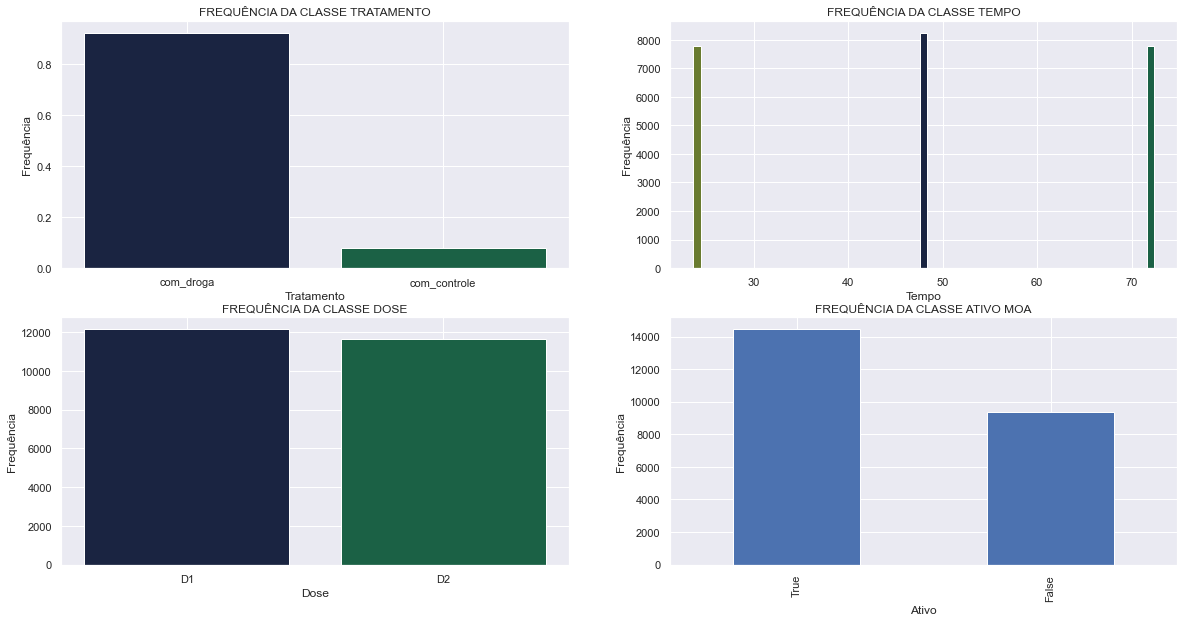

In [ ]:
#@title Dashboard de frequência das principais vaiáveis do conjunto de dados 
#@markdown Observa-se pelo dashboard abaixo que os dados encontram-se balanceados, com exceção da coluna "tratamento."

#@markdown Para esse atributo, observa-se que foi realizado um número expressivo de experientos com_droga a mais do que com_controle.

#@markdown Essa característica se deve ao tipo e área de negócio, que exige que esse tipo de pesquisa seja realizada com uma porcentagem de experimentos com placebo, na técnica duplo-cego.



# Gráfico função pyplot da biblioteca matplotlib
from matplotlib import pyplot as plt 
# Gráfico função gridspec da biblioteca matplotlib - para dashboard
from matplotlib import gridspec 
sns.set() #corrigir erro gráfico colab

#Calcula a frequencia e reverte o index. 
frequenciaTratamento = dados['tratamento'].value_counts(normalize = True).reset_index()
frequenciaTempo = dados['tempo'].value_counts().reset_index()
frequenciaDose = dados['dose'].value_counts().reset_index()
#frequenciaAtivoMoa = dados_combinados['ativo_moa'].value_counts().reset_index()

fig = plt.figure(figsize=(20,10))

# Função para criar um dashboard
specs = gridspec.GridSpec(ncols = 2, nrows = 2, figure= fig)

ax1 = fig.add_subplot(specs[0, 0 ]) 
ax2 = fig.add_subplot(specs[0, 1 ]) 
ax3 = fig.add_subplot(specs[1, 0 ]) 
ax4 = fig.add_subplot(specs[1, 1 ])

# GRÁFICO FREQUÊNCIA DA CLASSE TRATAMENTO
plt.grid()
ax1.bar(frequenciaTratamento['index'], frequenciaTratamento['tratamento'], color = sns.color_palette('cubehelix'), zorder = 2)
ax1.set_title('FREQUÊNCIA DA CLASSE TRATAMENTO')
ax1.set_xlabel('Tratamento')
ax1.set_ylabel('Frequência')

# GRÁFICO FREQUÊNCIA DA CLASSE TEMPO
#plt.grid()
ax2.bar(frequenciaTempo['index'], frequenciaTempo['tempo'], color = sns.color_palette('cubehelix'), zorder = 2)
ax2.set_title('FREQUÊNCIA DA CLASSE TEMPO')
ax2.set_xlabel('Tempo')
ax2.set_ylabel('Frequência')

# GRÁFICO FREQUÊNCIA DA CLASSE TEMPO
plt.grid()
ax3.bar(frequenciaDose['index'], frequenciaDose['dose'], color = sns.color_palette('cubehelix'), zorder = 2)
ax3.set_title('FREQUÊNCIA DA CLASSE DOSE')
ax3.set_xlabel('Dose')
ax3.set_ylabel('Frequência')

# GRÁFICO FREQUÊNCIA DA CLASSE TEMPO
plt.grid()
ax4 = dados_combinados['ativo_moa'].value_counts().plot.bar()
#ax4.bar(frequenciaAtivoMoa['index'], frequenciaAtivoMoa['ativo_moa'], color = sns.color_palette('cubehelix'), zorder = 2)
ax4.set_title('FREQUÊNCIA DA CLASSE ATIVO MOA')
ax4.set_xlabel('Ativo')
ax4.set_ylabel('Frequência')

plt.show()


In [ ]:
#@title Lista de drogas únicas utilizadas no tratamento com controle 

drogaControle = list(dados_combinados.query('tratamento == "com_controle"')['droga'].unique())
print(','.join([f'"{x}"' for x in drogaControle]))

"cacb2b860"


In [ ]:
#@title Limpeza do conjunto de dados
#@markdown Então, as drogas utilizadas nos tratamento do tipo "com_controle", por se tratarem de placebo, jamais serão capazes de ativar algum mecanismo de ação (MoA).

#@markdown Assim, deletamos todas as linhas cuja droga é igual a "cacb2b860", ou seja, com controle, uma vez que se tratam de placebos e nunca poderiam ativar mecanismos de ação.
#dados_combinados.query('droga =="cacb2b860"')
dados_combinados = dados_combinados.set_index("droga").drop("cacb2b860", axis = 0) 


In [ ]:
dados_combinados.shape

(21948, 878)

# Os Exames Laboratoriais 

### Testes estatísticos

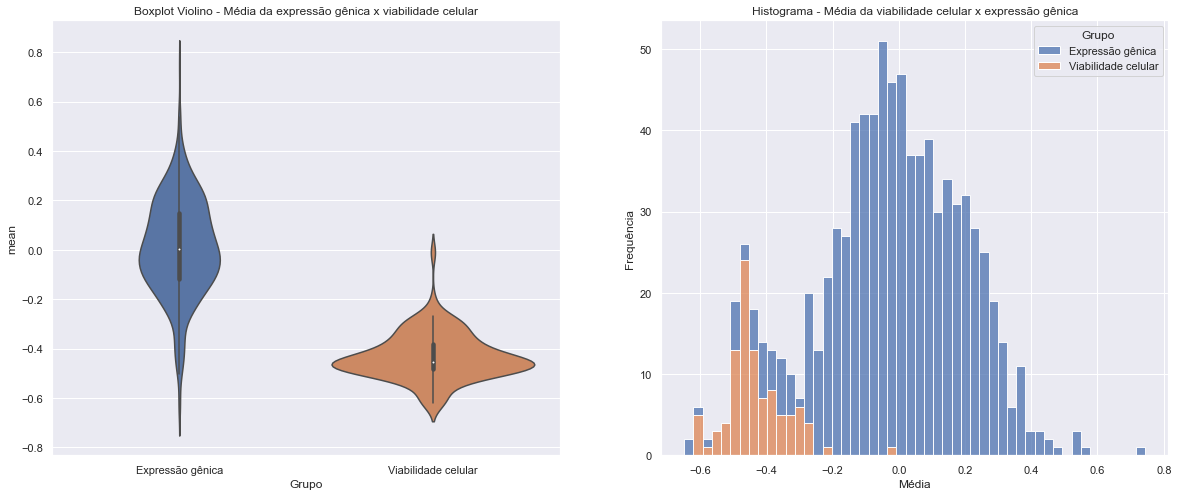

In [ ]:
#@title Análise da média da expressão gênica x viabilidade celular

#Extraindo os dados 
a = pd.DataFrame({ 'Grupo' : np.repeat('Expressão gênica',772), 'mean': dados.loc[:,'g-0':'g-771'].describe().T['mean']})
b = pd.DataFrame({ 'Grupo' : np.repeat('Viabilidade celular',100), 'mean': dados.loc[:,'c-0':'c-99'].describe().T['mean'] })
df = a.append(b)

# setando o tamanho do gráfico
fig = plt.figure(figsize=(20,8)) 
sns.set() #corrigir erro gráfico colab

#Definindo os parametros do terceiro gráfico 
ax1 = fig.add_subplot(1, 2, 1)  # Adiciona a 1 linha, coluna 1
ax1.set_title("Boxplot Violino - Média da expressão gênica x viabilidade celular")
ax1.set_xlabel("Grupo")
ax1.set_ylabel("Média")
sns.violinplot(x='Grupo', y='mean', data=df)

#Definindo os parametros do quarto gráfico 
ax2 = fig.add_subplot(1, 2, 2)  # Adiciona a 1 linha, coluna 2
ax2.set_title("Histograma - Média da viabilidade celular x expressão gênica")
ax2.set_xlabel("Média")
ax2.set_ylabel("Frequência")
sns.histplot(data=df,bins=50, x='mean', hue='Grupo', multiple="stack")

# Comando que retira informações extras/desnecessárias do gráfico 
plt.show()

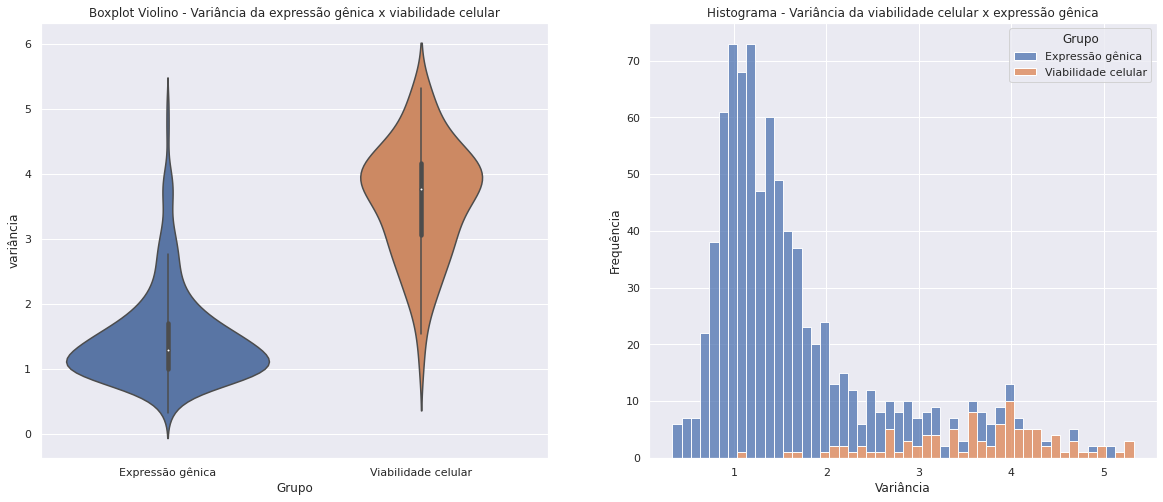

In [ ]:
#@title Análise da variância da expressão gênica x viabilidade celular
#Extraindo os dados 
a = pd.DataFrame({ 'Grupo' : np.repeat('Expressão gênica',772), 'variância': dados.loc[:,'g-0':'g-771'].var()})
b = pd.DataFrame({ 'Grupo' : np.repeat('Viabilidade celular',100), 'variância': dados.loc[:,'c-0':'c-99'].var() })
df = a.append(b)

# setando o tamanho do gráfico
fig = plt.figure(figsize=(20,8)) 

#Definindo os parametros do terceiro gráfico 
ax1 = fig.add_subplot(1, 2, 1)  # Adiciona a 1 linha, coluna 1
ax1.set_title("Boxplot Violino - Variância da expressão gênica x viabilidade celular")
ax1.set_xlabel("Grupo")
ax1.set_ylabel("Variância")
sns.violinplot(x='Grupo', y='variância', data=df)

#Definindo os parametros do quarto gráfico 
ax2 = fig.add_subplot(1, 2, 2)  # Adiciona a 1 linha, coluna 2
ax2.set_title("Histograma - Variância da viabilidade celular x expressão gênica")
ax2.set_xlabel("Variância")
ax2.set_ylabel("Frequência")
sns.histplot(data=df,bins=50, x='variância', hue='Grupo', multiple="stack")

# Comando que retira informações extras/desnecessárias do gráfico 
plt.show()

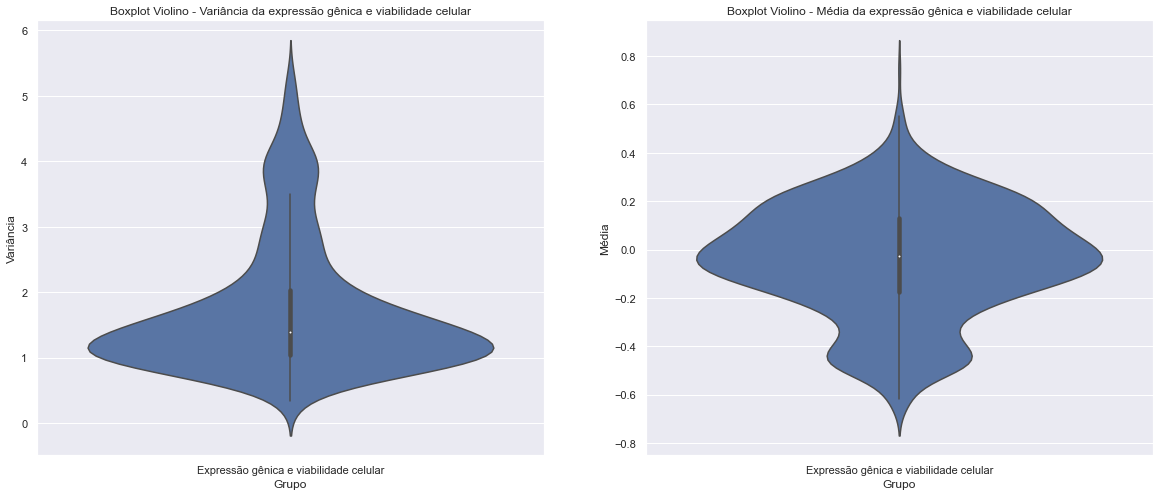

In [ ]:
#@title Análise da média e variância da expressão gênica do conjunto e viabilidade celular

#Extraindo os dados 
e = pd.DataFrame({ 'Grupo' : np.repeat('Expressão gênica e viabilidade celular',872), 'Variância': dados.loc[:,'g-0':'c-99'].var()})
g = pd.DataFrame({ 'Grupo' : np.repeat('Expressão gênica e viabilidade celular',872), 'Média': dados.loc[:,'g-0':'c-99'].describe().T['mean']})

# setando o tamanho do gráfico
fig = plt.figure(figsize=(20,8)) 

#Definindo os parametros do terceiro gráfico 
ax1 = fig.add_subplot(1, 2, 1)  # Adiciona a 1 linha, coluna 1
ax1.set_title("Boxplot Violino - Variância da expressão gênica e viabilidade celular")
ax1.set_xlabel("Grupo")
ax1.set_ylabel("Variância")
sns.violinplot(x='Grupo', y='Variância', data=e)

#Definindo os parametros do quarto gráfico 
ax2 = fig.add_subplot(1, 2, 2)  # Adiciona a 1 linha, coluna 2
ax2.set_title("Boxplot Violino - Média da expressão gênica e viabilidade celular")
ax2.set_xlabel("Grupo")
ax2.set_ylabel("Frequência")
sns.violinplot(x='Grupo', y='Média', data=g)

# Comando que retira informações extras/desnecessárias do gráfico 
plt.show()

# O Diagnóstico


### Sabendo-se que cada composto químico é considerado uma classe diferente, tem-se um **problema de classificação**.

# O Tratamento 


###Aplicação de algoritmos de *Machine Learning*

O algoritmo Gaussian Naive Baes é um dos principais modelos de machine learning utilizado em problemas de classificação multi-classes, ou seja, nos quais o conjunto de dados apresenta múltiplas classes e no qual busca-se a partir dessas classe acertar as variáveis-alvo para construir um modelo de predição, como no caso desse projeto em que busca-se a partir das classes expressão gênica e viabilidade celular descobrir quais efeitos foram ativados.[[Fonte: 4]](https://pubs.acs.org/doi/full/10.1021/acs.jcim.9b00136)


Os testes com esse modelo, apresentaram uma acurácia de 43% e se mostrou ineficaz com os parâmetros aplicados, uma vez que se chutassemos que todas as classes foram ativadas, acertariamos 60% das vezes. 

Observa-se ainda a ocorrência de overfitting, uma vez que as pontiações para o conjunto de treino ficaram abaixo dos valores para o conjunto de testes.

Esse resultado demonstrou a necessidade de buscar melhores parâmetros e técnicas de teste do modelo. 

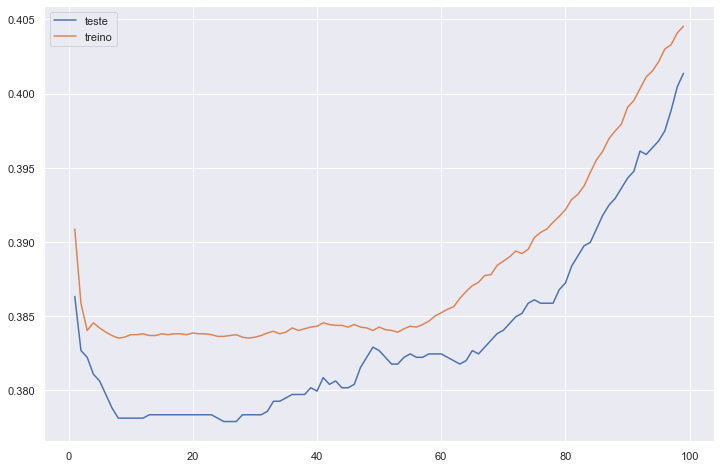

In [ ]:
#@title Resultado do teste do modelo Gaussian Naive Bayes (GaussianNB)


from sklearn.datasets import make_classification
from sklearn.naive_bayes import GaussianNB
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import train_test_split

x = dados_combinados.select_dtypes('float64') #seleciona expressão gênica e viabilidade celular (entradas)
y = dados_combinados['ativo_moa'] # se ativou ou não (classificação)

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2, stratify=y, random_state=42)

teste=[]
treino=[]

for i in range(1,100):
  modelo_nBayes = GaussianNB (priors = None, var_smoothing = i) # instancia o modelo de regressão. 
  modelo_nBayes.fit(x_treino, y_treino) # fit treina o  modelo 
  teste.append(modelo_nBayes.score(x_teste, y_teste)) # predição do modelo
  treino.append(modelo_nBayes.score(x_treino, y_treino))

sns.set()
plt.figure(figsize=(12,8))
sns.lineplot(x=range(1,100), y = teste, label='teste')
sns.lineplot(x=range(1,100), y = treino, label='treino')
plt.show()

#### **Problema dos parâmetros de um algoritmo de Machine Learning**

Percebe-se pelos testes realizados com o modelo MLPClassifier que não é uma tarfa fácil **descobrir** quais são os **parâmetros ideais** de se aplicar nos algoritmos de machine learning. 

Dada essa dificuldade, a tendência é optar por métodos de **tentativa-erro ou força bruta, até** encontrar um valor de parametro que produza a maior pontuação ou o  ***score* perfeiro**. 

Essa, no entanto, não é uma boa prática e frequentimente leva à ocorrência de erros metodológicos no modelo, pois corre-se o risco de ao avaliar e testar diferentes parâmetros **(hiperparâmetros)**, vazar dados do conjunto de testes para o conjunto de validação, tornando o algoritmo incapaz de **generalizar** o seu aprendizado para a **predição/descoberta de novos conhecimentos.**

Esse problema é também conhecido como **overfitting.** [ [Fonte: 1 e 2] ](https://scikit-learn.org/stable/modules/cross_validation.html)



#### **Problema do particionamento do conjunto de dados**

Ao **particionar **o conjunto de dados em **subconjunto de teste e validação**, temos o problema de** reduzir **drasticamente o número de **amostras** que podem ser usadas para aprender o modelo, e os resultados podem depender de uma escolha aleatória dos valores de parâmetros para o par de (teste, treino) que produzam o melhor resultado no modelo em estudo. 

#### **Validação Cruzada com Scikit-learn**

Para evitar o **overfitting** e demais erros metodológicos na construção do modelo e ainda assim mover-se na busca pelos melhores parâmetros **(Tuning)** aplicáveis ao problema de negócio, uma boa prática é a realização da **validação cruzada ** , uma técnica que particiona o conjuento de dads em vários subconjuntos, mutualmente exclusivos. Nessa técnica, utiliza-se parte dos subconjuntos para estimar os melhores valores para os parâmetros e a outra parte dos subconjuntos para validação do aprendizado do modelo. 

Esta técnica é amplamente empregada em problemas onde o objetivo da modelagem é a descoberta de conhecimento em conjuntos de dados novos e desconhecidos com as mesmas características do modelo, como é o caso do nosso projeto de **Drug Discovery**.[[Fonte 3]](https://pt.wikipedia.org/wiki/Valida%C3%A7%C3%A3o_cruzada)

Assim, buscou-se utilizar a **validação cruzada** para comparar os **melhores modelos de Machine Learning** aplicáveis ao problema de **Drug Discovery**. 

Os modelos a serem testados foram escolhidos com base no artigo **Machine Learning Methods in Drug Discovery** [[Fonte 4]](https://pubs.acs.org/doi/full/10.1021/acs.jcim.9b00136)

Existem três tipos principais de **métodos** para realização do **particionamento do conjunto de dados** na validação cruzada, sendo eles: **o método holdout, o k-fold e o leave-one-out.** [[Fonte 3]](https://pt.wikipedia.org/wiki/Valida%C3%A7%C3%A3o_cruzada)

No modelo  de Drug Discovery em estudo foi utlilizada a **validação cruzada pelo método k-fold** que consiste em: 



> Dividir o conjunto total de dados em k subconjuntos mutuamente exclusivos do mesmo tamanho e, a partir daí, um subconjunto é utilizado para teste e os k-1 restantes são utilizados para estimação dos parâmetros, fazendo-se o cálculo da acurácia do modelo. Este processo é realizado k vezes alternando de forma circular o subconjunto de teste. Ao final das k iterações calcula-se a acurácia sobre os erros encontrados, através da equação descrita anteriormente, obtendo assim uma medida mais confiável sobre a capacidade do modelo de representar o processo gerador dos dados. [[Fonte 3]](https://pt.wikipedia.org/wiki/Valida%C3%A7%C3%A3o_cruzada)


Para estabelecer se temos um bom valor de acurácia, precisamos de uma base comparativa, quer dizer, preciso dos resultados de um outro modelo para entender se estamos acertando mais ou menos casos.

Para isso, o Scikit-Learn, já tem implementado alguns algoritmos que fazer modelos **menos complexos** e que podem ser usados como **base comparativa**. Neste caso, vamos usar o **DummyClassifier.**












In [ ]:
#@title Teste simultâneo de seis modelos de Machine Learning 

#@markdown Adicionamos tambem o teste com o modelo "DummyClassifier", para fins de comparação dos resultados. 

from sklearn.model_selection import cross_val_score

from sklearn.datasets import make_classification

from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import train_test_split

from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.dummy import DummyClassifier #Base comparativa 


#Particionando o conjunto de dados 
x = dados_combinados.select_dtypes('float64') #seleciona expressão gênica e viabilidade celular (entradas) 
y = dados_combinados['ativo_moa'] # se ativou ou não (classificação)

#definindo treino 
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2, stratify=y, random_state=376)

# conjunto de modelos a serem testados 
models = [DummyClassifier(), MLPClassifier(51), LinearRegression(), SVC(), DecisionTreeClassifier(), RandomForestClassifier(), GaussianNB() ]

# cria lista de score de cada modelo
models_scores= []

COLUNAS= ['Modelo', 'Media', 'Desvio']
df = pd.DataFrame(columns=COLUNAS)

for model in models:
    val_scores = cross_val_score(model, x_treino, y_treino, cv=5)
    nome_modelo = type(model).__name__ # somente para exibição do nome do modelo no output
    print('Modelo: {} | Média: {:.2} | Desvio: {:.2} | Acurácia em cada cv: {}'.format(nome_modelo, np.mean(val_scores), np.std(val_scores),val_scores ))
    df = df.append({'Modelo': nome_modelo, 'Media': np.mean(val_scores), 'Desvio':np.std(val_scores)}, ignore_index=True)

/usr/local/lib/python3.7/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


Modelo: DummyClassifier | Média: 0.55 | Desvio: 0.0079 | Acurácia em cada cv: [0.55780182 0.53843964 0.55182232 0.53802336 0.55112504]
Modelo: MLPClassifier | Média: 0.62 | Desvio: 0.0053 | Acurácia em cada cv: [0.61560364 0.62243736 0.62443052 0.61891199 0.60951296]
Modelo: LinearRegression | Média: 0.023 | Desvio: 0.011 | Acurácia em cada cv: [0.03464081 0.01003135 0.03471145 0.02475938 0.01125653]
Modelo: SVC | Média: 0.67 | Desvio: 0.0022 | Acurácia em cada cv: [0.66884966 0.66970387 0.67084282 0.66562233 0.66533751]
Modelo: DecisionTreeClassifier | Média: 0.58 | Desvio: 0.0095 | Acurácia em cada cv: [0.57374715 0.59197039 0.56776765 0.56764455 0.58387924]
Modelo: RandomForestClassifier | Média: 0.66 | Desvio: 0.0019 | Acurácia em cada cv: [0.66230068 0.66714123 0.66571754 0.66505269 0.6622045 ]
Modelo: GaussianNB | Média: 0.43 | Desvio: 0.0061 | Acurácia em cada cv: [0.42853075 0.43536446 0.4191344  0.42637425 0.43520365]


# A Receita Médica


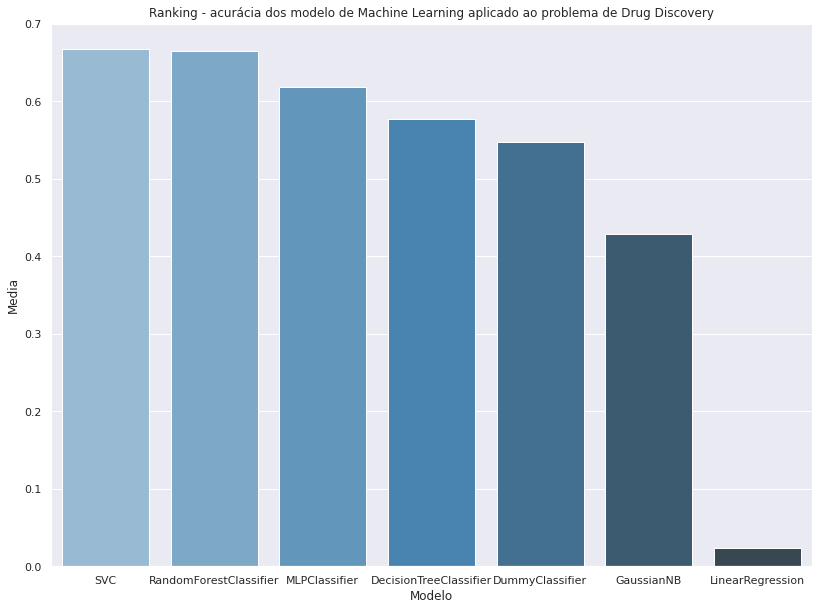

In [ ]:
#@title Comparação de algoritmos

#Extraindo dados 
Ranking = df.sort_values(by ='Media', ascending= False)

# setando o tamanho do gráfico
fig = plt.figure(figsize=(30,10)) 

#Definindo os parametros do terceiro gráfico 
ax1 = fig.add_subplot(1, 2, 1)  # Adiciona a 1 linha, coluna 1
ax1.set_title("Ranking - acurácia dos modelo de Machine Learning aplicado ao problema de Drug Discovery")
sns.barplot(x="Modelo", y="Media", ax= ax1, data=Ranking, palette="Blues_d")
plt.show()

####A partir da aplicação da técnica de **validação cruzada,** pode-se avaliar o desenpenho dos algoritmos antes da otimização dos parâmetros. Assim, essa técnica funciona como uma **pré-triagem** para selecionar o método que melhor se aplica ao problema. 

####A partir dos resultados podemos escolher 2 ou 3 métodos que tiveram o melhor desempenho para fazer a **tunning** dos parâmetros e encontrar os **hiperparâmetros.** 



# O Remédio 


### Encontrar um modelo de *Machine Learning* capaz de prever se:

**Dado um composto e uma assinatura celular algum MoA será ativado**.


Pelo teste simultâneo, temos que o algoritmo que apresentou a melhor acurácia foi o SVC.



In [ ]:
from sklearn.svm import SVC

# Instancia o modelo SVC escolhido, por apresentar a maior acurácia 
SVC_to_boost = SVC (random_state = 376)

### Ajustando a dose

In [ ]:
# Obtem os parâmetros disponíveis do modelo SVC, para ajuste
SVC_to_boost.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': 376,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [ ]:
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_SVC_grid = {'C': [10, 100, 1000], 
              'gamma': [0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 

boosting_SVC_grid = GridSearchCV(estimator = SVC_to_boost, param_grid = param_SVC_grid , refit = True, verbose = 3, cv = 3)


In [ ]:
#Particionando o conjunto de dados 
x = dados_combinados.select_dtypes('float64') #seleciona expressão gênica e viabilidade celular (entradas) 
y = dados_combinados['ativo_moa'] # se ativou ou não (classificação)

#definindo treino 
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2, stratify=y, random_state=376)

boosting_SVC_grid.fit(x_treino, y_treino)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] C=10, gamma=0.01, kernel=rbf ....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.682, total=16.1min
[CV] C=10, gamma=0.01, kernel=rbf ....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 16.1min remaining:    0.0s


[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.678, total=16.3min
[CV] C=10, gamma=0.01, kernel=rbf ....................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 32.4min remaining:    0.0s


[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.680, total=15.9min
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.988, total= 2.2min
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.984, total= 2.1min
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.985, total= 2.1min
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] ...... C=10, gamma=0.0001, kernel=rbf, score=0.999, total= 1.1min
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] ...... C=10, gamma=0.0001, kernel=rbf, score=0.999, total= 1.1min
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] ...... C=10, gamma=0.0001, kernel=rbf, score=0.999, total= 1.1min
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV] .

[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed: 173.8min finished


GridSearchCV(cv=3, estimator=SVC(random_state=376),
             param_grid={'C': [10, 100, 1000], 'gamma': [0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [ ]:
boosting_SVC_grid.best_params_


{'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}

### Verificando os resultados

In [ ]:
# Classification Report and ROC for this dataset
from sklearn.metrics import classification_report, confusion_matrix 
grid_predictions = boosting_SVC_grid.predict(x_teste)
  
# print classification report
print(metrics.classification_report(y_teste, grid_predictions))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00      1500
        True       1.00      1.00      1.00      2890

    accuracy                           1.00      4390
   macro avg       1.00      1.00      1.00      4390
weighted avg       1.00      1.00      1.00      4390



In [ ]:
    modelo_svc = SVC(C= 10, gamma =0.0001, kernel = 'rbf')
    modelo_svc.fit(x_treino, y_treino)
    print ("score do modelo de teste:",  modelo_svc.score(x_teste, y_teste), "\n", "score do modelo de treino:", modelo_svc.score(x_treino, y_treino))

score do modelo de teste: 0.9984054669703872 
 score do modelo de treino: 1.0


In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn import metrics
import scikitplot as skplt
from matplotlib.colors import ListedColormap
cmap = ListedColormap(sns.color_palette("Greens_r"))


In [ ]:
 pip install scikit-plot

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from sklearn import metrics
import scikitplot as skplt


In [ ]:
Final_pred_teste = modelo_svc.predict(x_teste)

In [ ]:
print(metrics.classification_report(y_teste, Final_pred_teste))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00      1500
        True       1.00      1.00      1.00      2890

    accuracy                           1.00      4390
   macro avg       1.00      1.00      1.00      4390
weighted avg       1.00      1.00      1.00      4390



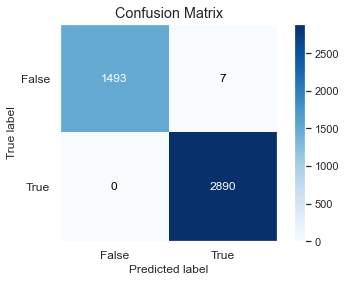

In [ ]:
skplt.metrics.plot_confusion_matrix(y_teste, Final_pred_teste)
plt.show()

In [ ]:
Final_pred_treino = modelo_svc.predict(x_treino)

In [ ]:
print(metrics.classification_report(y_treino, Final_pred_treino))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00      6001
        True       1.00      1.00      1.00     11557

    accuracy                           1.00     17558
   macro avg       1.00      1.00      1.00     17558
weighted avg       1.00      1.00      1.00     17558



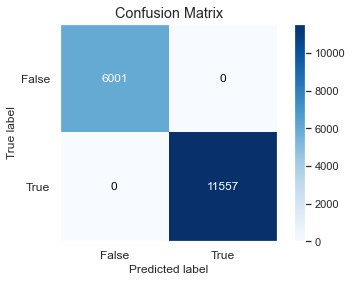

In [ ]:
skplt.metrics.plot_confusion_matrix(y_treino, Final_pred_treino)
plt.show()

# O *Check-up* Médico



### Considerações Finais

#### Durante a execução desse projeto, observa-se que é possível traçar um **algorítimo** para o desenvolvimento de projeto de **Machine Learning**. 

#### A primera coisa a se fazer é **conhecer o conjunto de dados:**

1.   Qual o tamanho desse banco de dados?
2.   Quais são os seus atributos?
3.   Quais são os tipos desses atributos?
4.   Qual a relação entre as variáveis?
5.   Os dados estã obalanceados?
5.   É necessário criar variáveis ou mudar a estrutura da base de dados para faciliar a análise?

####Respondidas essas perguntas, temos que fazer **testes estatísticos** buscando por erros, incoerências e para entender como esses dados estã odistrinuídos.

#### A partir das características identificadas, passamos para o levantamento do problema de negócio:

2. É um problema de regressão?
3. É um problema de classificação?
4. É um problema de clusterização?
5. Ou não é um problema de machine learning?

#### Se for um problema de machine learning, devemos** levantar os principais algoritmos** aplicados para esse tipo de problema. Testá-los e Otimizá-los.





### Limitações do seu projeto

O projeto não realizou a otimização dos parâmtros de teste, nem especificou o intervalo de confiança para sua utilização. 

### Ideias para projetos futuros

O próximo passo seria encontrar os hiperparâmetros utilizando a classe GridSearchCV() do sklearn, que consegue indicar os melhores valores de parâmetros para um determinado modelo a partir do conjunto de dados.

Outra etapa necessária seria estudar modelos mais aplicaveis a problemas cujo conjunto de dados apresenta alta variância, conforme [demonstrado](https://colab.research.google.com/drive/13GAOWcEivzu6w66gbxfpzSUHBXQjjfUb#scrollTo=aqzzHx4yRgda&line=1&uniqifier=1)




#O Catálogo de Medicamentos

1. [Validação Cruzada com Scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)
2. [Validação cruzada: avaliando o desempenho do estimador com Scikit-learn](https://scikit-learn.org/stable/modules/cross_validation.html)
3. [Validação cruzada](https://pt.wikipedia.org/wiki/Valida%C3%A7%C3%A3o_cruzada)
4. [Machine Learning in Drug Discovery](https://pubs.acs.org/doi/full/10.1021/acs.jcim.9b00136)
5. [sklearn.naive_bayes.GaussianNB ](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html?highlight=naive#sklearn.naive_bayes.GaussianNB/)
6. [A Gentle Introduction to Bayes Theorem for Machine Learning](https://machinelearningmastery.com/bayes-theorem-for-machine-learning/)
7. [Validação Cruzada Aninhada com Scikit-learn](https://dataml.com.br/validacao-cruzada-aninhada-com-scikit-learn/)

 ***- Mergulhe fundo, é apenas o primeiro passo -***